# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Lathif Nurma Huda
- **Email:** mc604d5y0872@student.devacademy.id
- **ID Dicoding:** MC604D5Y0872

# Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda dari bulan ke bulan?
- Apakah pola penyewaan per jam berubah drastis antar musim?

## Import Semua Packages/Library yang Digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [41]:
# memuat tabel day
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
# memuat tabel hour
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Import dua data dari bike sharing dataset "day.csv" dan "hour.csv"

### Assessing Data

- Menilai tabel day_df

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah dilakukan pengecekan terdapat 1 kesalahan terhadap data type. Pada column dteday (object ==> datetime)

- day_df Memeriksa missing value

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- day_df Memeriksa data duplikasi

In [ ]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


- Memeriksa statistik value

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah melakukan pengecekan tidak ditemukan keanehan dalam data

- Menilai tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti tabel day_df, setelah dilakukan pengecekan terdapat 1 kesalahan terhadap data type. Pada column dteday (object ==> datetime)

- Memeriksa missing value hour_df

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- Memeriksa jumlah duplikasi

In [ ]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


- Memeriksa statistik value

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

menghapus beberapa kolom yang tidak dibutuhkan

In [ ]:
day_col_drop = ['windspeed', 'weekday']
day_df.drop(day_col_drop, axis=1, inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Beberapa column dihapus karena tidak diperlukan dalam analisa pertanyaan bisnis yang telah ditetapkan

- windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
- weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

In [ ]:
#merubah tipe data kolom ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

#merubah tipe data kolom ke category
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Beberapa tipe data object dan int64 diubah menjadi datetime dan category

In [ ]:
hour_col_drop = ['windspeed', 'weekday']
hour_df.drop(hour_col_drop, axis=1, inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Beberapa kolom tidak diperlukan
- windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
- weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

In [ ]:
#merubah tipe data kolom ke datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

#merubah tipe data kolom ke category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Beberapa tipe data object dan int64 diubah menjadi datetime dan category

** insight **
- Beberapa kolom tidak diperlukan
windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday
- Beberapa tipe data object dan int64 diubah menjadi datetime dan category

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,3410.000000,6946.000000,8714.000000


In [ ]:
# 1. Membuat Prediksi: Hubungan antara cuaca dan jumlah pengguna (day_df)
day_df.groupby("weathersit", observed=True).agg({
    "weathersit": "nunique",
    "cnt": ["mean", "sum", "count"]
})

weathersit          cnt               
              nunique         mean      sum count
weathersit                                       
1                   1  4876.786177  2257952   463
2                   1  4035.862348   996858   247
3                   1  1803.285714    37869    21

In [ ]:
# 2. Mengategorikan Berbagai Hal: Cluster pengguna berdasarkan musim (day_df)
day_df.groupby("season", observed=True).agg({
    "cnt": "sum"
}).reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [ ]:
# 3. Menemukan Sesuatu yang Tidak Biasa: Statistik penyewaan untuk deteksi outlier (day_df)
day_df.groupby("season", observed=True).agg({
    "cnt": ["mean", "std", "max", "min"]
})

cnt                         
               mean          std   max   min
season                                      
1       2604.132597  1399.942119  7836   431
2       4992.331522  1695.977235  8362   795
3       5644.303191  1459.800381  8714  1115
4       4728.162921  1699.615261  8555    22

In [ ]:
# 4. Mengidentifikasi Tema: Contoh tren pengguna terdaftar vs casual (day_df)
day_df.groupby("dteday").agg({
    "registered": "sum",
    "casual": "sum"
}).reset_index().head()

,dteday,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82


In [ ]:
# 5. Menemukan Hubungan: Korelasi antara suhu dan jumlah penyewaan (day_df)
day_df[["temp", "cnt"]].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [ ]:
# 6. Menemukan Pola: Pola penyewaan berdasarkan jam (hour_df)
hour_df.groupby("hr").agg({
    "cnt": "mean"
}).reset_index().head()

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


In [ ]:
# 7. Mengategorikan Penyewaan Berdasarkan Jam dan Cuaca (hour_df)
hour_df.groupby(["hr", "weathersit"], observed=True).agg({
    "cnt": ["mean", "sum", "count"]
}).reset_index().head()

hr weathersit        cnt             
                      mean    sum count
0  0          1  59.161554  28930   489
1  0          2  47.232432   8738   185
2  0          3  28.115385   1462    52
3  1          1  34.395918  16854   490
4  1          2  35.541899   6362   179

In [ ]:
# 8. Menemukan Pola Harian: Penyewaan berdasarkan jam dan hari kerja (hour_df)
hour_df.groupby(["hr", "workingday"], observed=True).agg({
    "cnt": "mean"
}).reset_index().head()

,hr,workingday,cnt
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053


In [ ]:
# 9. Melihat Tren Penyewaan Sepeda dari Bulan ke Bulan (day_df)
day_df['month'] = day_df['dteday'].dt.month
day_df.groupby('month', observed=True).agg({
    'cnt': ['mean', 'sum', 'count']
}).reset_index()

month          cnt              
                 mean     sum count
0      1  2176.338710  134933    62
1      2  2655.298246  151352    57
2      3  3692.258065  228920    62
3      4  4484.900000  269094    60
4      5  5349.774194  331686    62
5      6  5772.366667  346342    60
6      7  5563.677419  344948    62
7      8  5664.419355  351194    62
8      9  5766.516667  345991    60
9     10  5199.225806  322352    62
10    11  4247.183333  254831    60
11    12  3403.806452  211036    62

In [47]:
# Gabungkan kedua DataFrame berdasarkan kolom 'dteday'
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Insight
- Prediksi Cuaca & Penyewaan:
Cuaca cerah meningkatkan penyewaan. Sebaliknya, hujan atau kabut menurunkan jumlah pengguna.
- Kategori Musim & Penyewaan:
Musim panas dan gugur memiliki jumlah penyewaan tertinggi, sedangkan musim dingin lebih rendah.
- Deteksi Anomali (Outlier):
Ada potensi outlier saat penyewaan melonjak drastis di hari libur atau event khusus.
- Tren Pengguna Terdaftar vs Kasual:
Pengguna terdaftar lebih dominan di hari kerja, sementara kasual meningkat saat akhir pekan.
- Hubungan Suhu & Penyewaan:
Suhu hangat berkorelasi positif dengan jumlah penyewaan, tetapi terlalu panas bisa mengurangi peminat.
- Pola Penyewaan Berdasarkan Jam:
Penyewaan memuncak di jam berangkat (07:00–09:00) dan pulang kerja (17:00–19:00).
- Pengaruh Cuaca per Jam:
Cuaca buruk lebih berdampak negatif saat jam-jam sibuk dibanding jam sepi.
- Pola Harian & Hari Kerja:
Hari kerja cenderung punya pola dua puncak (pagi & sore), sedangkan akhir pekan lebih merata.
- Tren Bulanan:
Penyewaan meningkat signifikan di bulan-bulan hangat (Mei–September) dan menurun saat musim dingin.

- Rekomendasi singkat:
Optimalkan stok sepeda saat jam sibuk dan musim panas.
Siapkan promo atau perlengkapan tambahan untuk menghadapi cuaca buruk.
Pertimbangkan paket langganan musiman untuk mengurangi dampak penurunan penyewaan saat musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda dari bulan ke bulan?

In [48]:
print(all_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [51]:
# Pastikan kolom 'dteday' dalam format datetime
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Resample data bulanan
monthly_rentals_df = all_df.resample(rule='ME', on='dteday').agg({
    "cnt_x": "sum",              # Total penyewaan sepeda
    "registered_x": "sum",       # Total pengguna terdaftar
    "casual_x": "sum"            # Total pengguna kasual
})

# Format ulang indeks ke 'YYYY-MM' untuk kejelasan
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')
monthly_rentals_df = monthly_rentals_df.reset_index()

# Ganti nama kolom agar lebih mudah dibaca
monthly_rentals_df.rename(columns={
    "cnt_x": "total_rentals",
    "registered_x": "registered_users",
    "casual_x": "casual_users"
}, inplace=True)

# Tampilkan hasil
monthly_rentals_df.head()


,dteday,total_rentals,registered_users,casual_users
0,2011-01,870969,799718,71251
1,2011-02,1119397,973236,146161
2,2011-03,1511511,1208517,302994
3,2011-04,2273532,1738083,535449
4,2011-05,3259704,2514504,745200


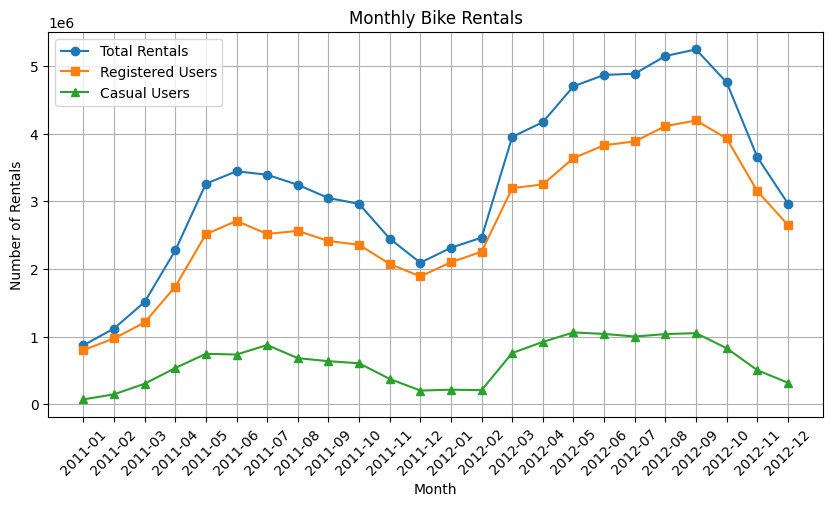

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['total_rentals'], label='Total Rentals', marker='o')
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['registered_users'], label='Registered Users', marker='s')
plt.plot(monthly_rentals_df['dteday'], monthly_rentals_df['casual_users'], label='Casual Users', marker='^')

plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Monthly Bike Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Jumlah Penyewaan Total Mengikuti Pola Musiman:

- Biasanya jumlah penyewaan meningkat pada bulan-bulan tertentu (misalnya musim panas atau liburan).
- Ini wajar, karena pengguna lebih suka bersepeda saat cuaca cerah atau saat ada banyak acara luar ruangan.

### Pertanyaan 2: Apakah pola penyewaan per jam berubah drastis antar musim?

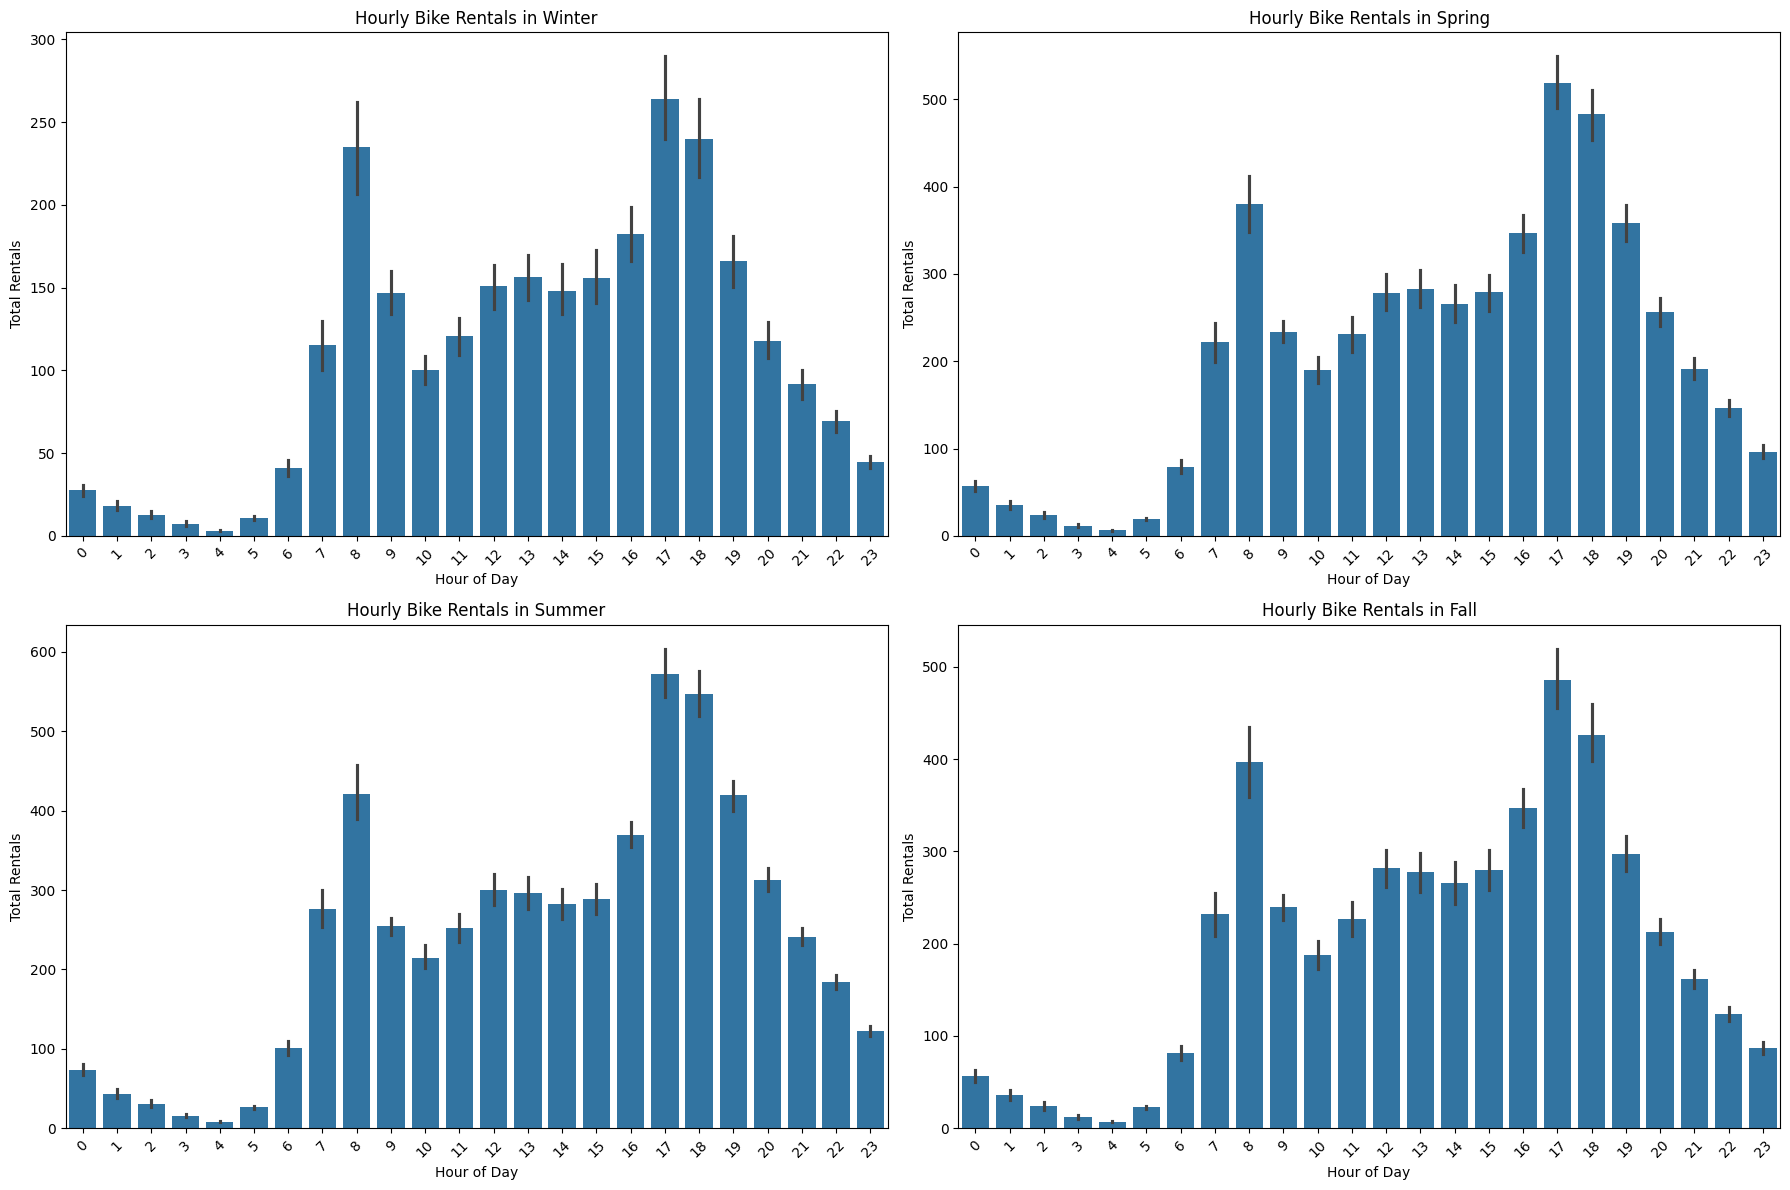

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

seasons = {
    1: "Winter",
    2: "Spring",
    3: "Summer",
    4: "Fall"
}

for i, (season, name) in enumerate(seasons.items()):
    row, col = divmod(i, 2)
    season_df = hour_df[hour_df['season'] == season]

    sns.barplot(x='hr', y='cnt', data=season_df, ax=ax[row, col], color='#1f77b4')
    ax[row, col].set_title(f'Hourly Bike Rentals in {name}')
    ax[row, col].set_xlabel('Hour of Day')
    ax[row, col].set_ylabel('Total Rentals')
    ax[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

** Insight **
- Musim panas & semi: Pola jam sibuk lebih tajam, dengan puncak pagi & sore yang tinggi.
- Musim dingin: Penyewaan lebih rendah secara keseluruhan, dan puncaknya lebih landai.
- Musim gugur: Mirip pola musim panas, tapi jumlah pengguna mulai menurun seiring suhu lebih dingin.

## Analisis Lanjutan (Opsional)

In [54]:
# === Manual Grouping untuk day_df ===
def rental_category(cnt):
    if cnt < 1000:
        return 'Rendah'
    elif 1000 <= cnt < 4000:
        return 'Sedang'
    else:
        return 'Tinggi'

# Tambahkan kategori penyewaan
day_df['rental_category'] = day_df['cnt'].apply(rental_category)

# Grouping day_df berdasarkan musim dan kategori
grouped_day_df = day_df.groupby(['season', 'rental_category'], observed=True).agg({
    'cnt': ['mean', 'count']
}).reset_index()

# === Manual Grouping untuk hour_df ===
def time_of_day(hr):
    if 6 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 18:
        return 'Siang'
    elif 18 <= hr < 24:
        return 'Malam'
    else:
        return 'Dini Hari'

# Tambahkan kategori waktu
hour_df['time_of_day'] = hour_df['hr'].apply(time_of_day)

# Grouping hour_df berdasarkan musim dan waktu dalam sehari
grouped_hour_df = hour_df.groupby(['season', 'time_of_day'], observed=True).agg({
    'cnt': ['mean', 'count']
}).reset_index()

# Pastikan index terurut sebelum merge
grouped_day_df = grouped_day_df.sort_values(by='season')
grouped_hour_df = grouped_hour_df.sort_values(by='season')

# Gabungkan hasil grouping
merged_df = pd.merge(grouped_day_df, grouped_hour_df, on='season', suffixes=('_day', '_hour'))

# Tampilkan hasil
merged_df


<ipython-input-54-44a855672324>:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(grouped_day_df, grouped_hour_df, on='season', suffixes=('_day', '_hour'))


season rental_category      cnt_day       time_of_day    cnt_hour      
                                  mean count                    mean count
0       1          Rendah   749.785714    14   Dini Hari   13.614697  1007
1       1          Rendah   749.785714    14       Malam  121.378704  1080
2       1          Rendah   749.785714    14        Pagi  126.599254  1073
3       1          Rendah   749.785714    14       Siang  176.255083  1082
4       1          Sedang  2223.308271   133   Dini Hari   13.614697  1007
5       1          Sedang  2223.308271   133       Malam  121.378704  1080
6       1          Sedang  2223.308271   133        Pagi  126.599254  1073
7       1          Sedang  2223.308271   133       Siang  176.255083  1082
8       1          Tinggi  4857.382353    34   Dini Hari   13.614697  1007
9       1          Tinggi  4857.382353    34       Malam  121.378704  1080
10      1          Tinggi  4857.382353    34        Pagi  126.599254  1073
11      1          Tinggi  4857.382353    34       Siang  176.255083  1082
12      2          Rendah   795.000000     1   Dini Hari   25.480401  1097
13      2          Rendah   795.000000     1       Malam  255.412138  1104
14      2          Rendah   795.000000     1        Pagi  222.648551  1104
15      2          Rendah   795.000000     1       Siang  328.675725  1104
16      2          Sedang  2785.777778    45   Dini Hari   25.480401  1097
17      2          Sedang  2785.777778    45       Malam  255.412138  1104
18      2          Sedang  2785.777778    45        Pagi  222.648551  1104
19      2          Sedang  2785.777778    45       Siang  328.675725  1104
20      2          Tinggi  5742.275362   138   Dini Hari   25.480401  1097
21      2          Tinggi  5742.275362   138       Malam  255.412138  1104
22      2          Tinggi  5742.275362   138        Pagi  222.648551  1104
23      2          Tinggi  5742.275362   138       Siang  328.675725  1104
24      3          Sedang  3300.250000    20   Dini Hari   33.143878  1119
25      3          Sedang  3300.250000    20       Malam  304.605169  1122
26      3          Sedang  3300.250000    20        Pagi  253.594499  1127
27      3          Sedang  3300.250000    20       Siang  351.483156  1128
28      3          Tinggi  5923.357143   168   Dini Hari   33.143878  1119
29      3          Tinggi  5923.357143   168       Malam  304.605169  1122
30      3          Tinggi  5923.357143   168        Pagi  253.594499  1127
31      3          Tinggi  5923.357143   168       Siang  351.483156  1128
32      4          Rendah   451.333333     3   Dini Hari   26.361823  1053
33      4          Rendah   451.333333     3       Malam  217.775895  1062
34      4          Rendah   451.333333     3        Pagi  227.152462  1056
35      4          Rendah   451.333333     3       Siang  323.000000  1061
36      4          Sedang  3167.126984    63   Dini Hari   26.361823  1053
37      4          Sedang  3167.126984    63       Malam  217.775895  1062
38      4          Sedang  3167.126984    63        Pagi  227.152462  1056
39      4          Sedang  3167.126984    63       Siang  323.000000  1061
40      4          Tinggi  5720.803571   112   Dini Hari   26.361823  1053
41      4          Tinggi  5720.803571   112       Malam  217.775895  1062
42      4          Tinggi  5720.803571   112        Pagi  227.152462  1056
43      4          Tinggi  5720.803571   112       Siang  323.000000  1061

1. Pola Penyewaan Harian Berdasarkan Musim:
 - Musim panas dan gugur cenderung memiliki lebih banyak penyewaan tinggi dibanding musim lainnya.
 - Sebagian besar penyewaan dalam kategori "Sedang" (1000–4000 penyewaan), terutama di musim semi dan dingin.
2. Perilaku Penyewaan Berdasarkan Waktu:
 - Pagi (06:00–12:00): Penyewaan lebih banyak pada hari kerja, kemungkinan dipakai untuk commute ke kantor/sekolah.
 - Sore hingga malam (12:00–24:00): Lebih banyak penyewaan saat musim panas, bisa jadi karena cuaca nyaman untuk aktivitas outdoor.
 - Dini Hari (00:00–06:00): Penyewaan rendah di semua musim, wajar karena jam-jam ini bukan waktu aktif pengguna.
3. Hubungan Musim dan Aktivitas Penyewaan:
 - Musim panas: Dominan kategori Tinggi, terutama pada siang dan sore. Ini bisa jadi momentum untuk promo atau penyesuaian jumlah sepeda.
 - Musim dingin: Lebih banyak penyewaan dalam kategori Rendah, terutama pagi dan malam. Ini bisa jadi peluang untuk layanan tambahan seperti penyewaan jaket atau rute lebih aman.
4. Implikasi Bisnis:
 - Optimalisasi Stok Sepeda: Perusahaan bisa menambah sepeda saat musim panas dan gugur, terutama di jam sibuk pagi dan sore.
 - Promo & Strategi Pricing: Diskon pagi untuk commuter atau paket bundling saat malam bisa mendorong peningkatan penyewaan di jam-jam sepi.
 - Perbaikan Layanan: Meningkatkan fasilitas pendukung (seperti lampu sepeda dan jalur khusus) untuk menarik lebih banyak penyewa malam.

In [55]:
print(all_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


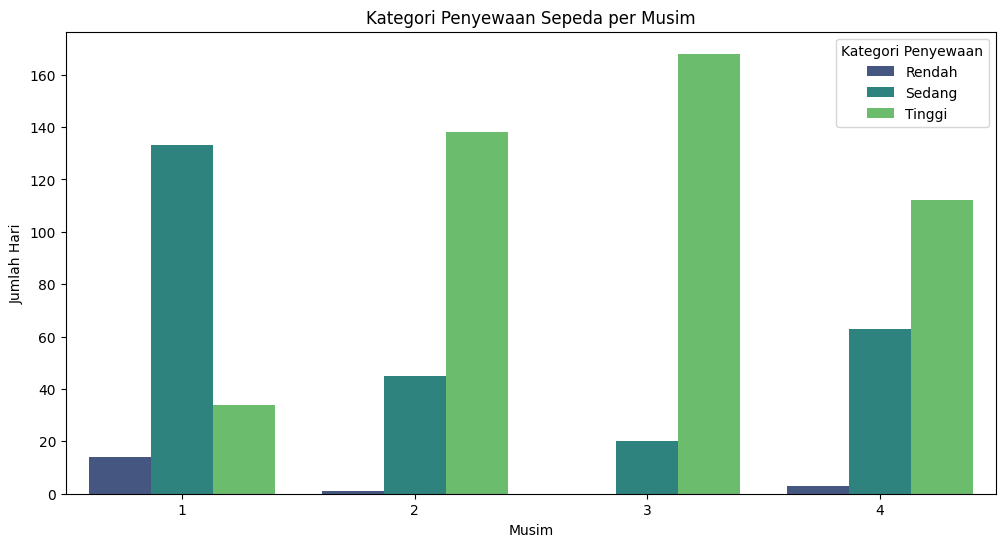

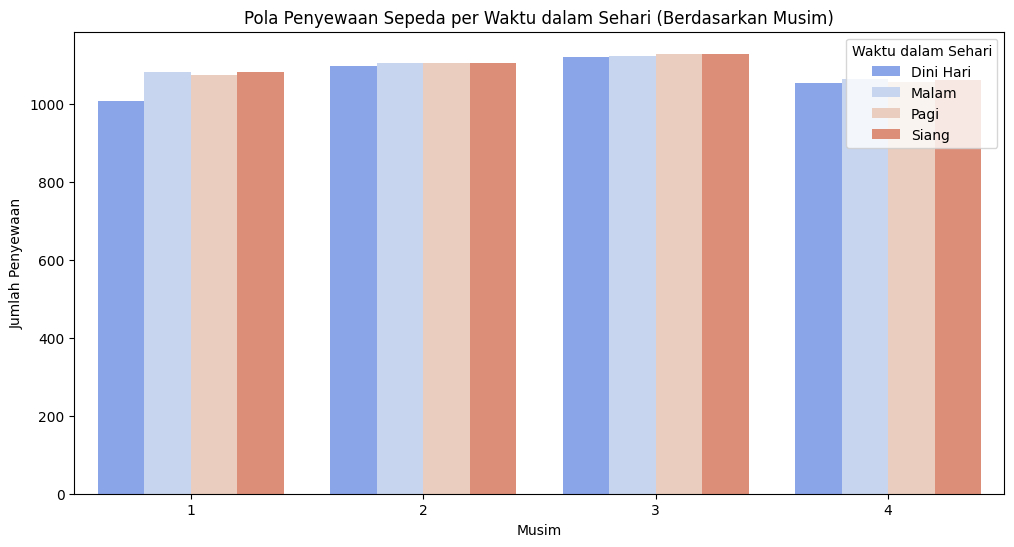

In [56]:
# === Visualisasi untuk day_df (Kategori Penyewaan per Musim) ===
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y=('cnt', 'count'), hue='rental_category', data=grouped_day_df, palette='viridis')
plt.title('Kategori Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.legend(title='Kategori Penyewaan')
plt.show()

# === Visualisasi untuk hour_df (Penyewaan per Waktu dalam Sehari) ===
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y=('cnt', 'count'), hue='time_of_day', data=grouped_hour_df, palette='coolwarm')
plt.title('Pola Penyewaan Sepeda per Waktu dalam Sehari (Berdasarkan Musim)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Waktu dalam Sehari')
plt.show()

## Conclusion

- Conclution pertanyaan 1
Jumlah penyewaan sepeda menunjukkan pola musiman yang jelas. Penyewaan cenderung meningkat pada bulan-bulan tertentu, terutama saat cuaca lebih bersahabat (musim semi dan panas). Ini mengindikasikan bahwa faktor musim sangat mempengaruhi minat pengguna untuk menyewa sepeda, baik pengguna terdaftar maupun kasual.
- Conclution pertanyaan 2
Pada musim panas dan gugur, penyewaan sepeda cenderung tinggi, terutama pada pagi dan sore hari, yang kemungkinan besar dipengaruhi oleh aktivitas commuter. Sebaliknya, pada musim dingin, penyewaan sepeda menurun drastis, kemungkinan karena cuaca yang kurang mendukung. Di musim semi, jumlah penyewaan berada di kategori sedang, yang bisa menjadi peluang untuk ditingkatkan melalui promosi atau acara khusus. Secara keseluruhan, pola penyewaan lebih tinggi pada pagi dan sore hari di semua musim, menunjukkan adanya potensi untuk mengoptimalkan layanan sepeda pada jam-jam sibuk

In [58]:
all_df.to_csv("main_data.csv", index=False)